# Гайд для сергея чуприна по курсу МФТИ №10
ответы на первые 3 в самом низу

ДАЛЬШЕ НЕНУЖНОЕ ГОВНО

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

/var/folders/64/q9vthv094_591jd1jlz91_x00000gn/T/ipykernel_2553/988218014.py:3: RuntimeWarning: invalid value encountered in power
  y = x ** x


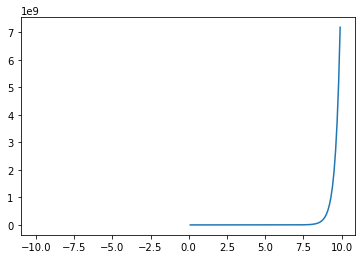

In [13]:
x = np.arange(-10, 10, 0.1)
dx = x[1] - x[0]
y = x ** x
dydx = np.gradient(y, dx)
plt.plot(x, y)

In [19]:
x = np.linspace(-10 , 10)
dx = x[1]-x[0]
y = np.tan(x) * np.log10(np.cos(x ** 2) + 1)
dydx = np.gradient(y, dx)

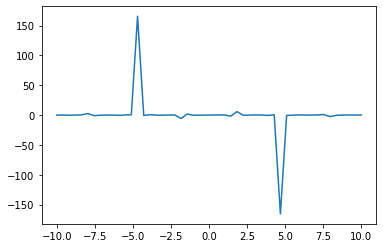

In [20]:
plt.plot(x, y)

# Вот тут весело
# Задание 10.3

ты должен это посчитать (эта функция вычисляет производные)

In [25]:
from sympy import *

# create a "symbol" called x
x = Symbol('x')

#Define function
f = tan(x) * ln(cos(x ** 2) + 1)

#Calculating Derivative
derivative_f = f.diff(x)

derivative_f

-2*x*sin(x**2)*tan(x)/(cos(x**2) + 1) + (tan(x)**2 + 1)*log(cos(x**2) + 1)

# 10.1.4

In [ ]:
def numerical_derivative_1d(func, epsilon):
    """
    Функция для приближённого вычисления производной функции одной переменной.
    :param func: float -> float — произвольная дифференцируемая функция
    :param epsilon: float — максимальная величина приращения по оси Ох
    :return: другая функция, которая приближённо вычисляет производную в точке
    """
    def deriv_func(x):
        return (func(x + epsilon) - func(x)) / epsilon
    return deriv_func

# 10.1.5

In [27]:
def grad_descent_v1(f, deriv, x0=None, lr=0.1, iters=100, callback=None):
    """
    Реализация градиентного спуска для функций с одним локальным минимумом,
    совпадающим с глобальным. Все тесты будут иметь такую природу.
    :param func: float -> float — функция
    :param deriv: float -> float — её производная
    :param x0: float — начальная точка
    :param lr: float — learning rate
    :param iters: int — количество итераций
    :param callback: callable — функция логирования
    """

    if x0 is None:
        # Если точка не дана, сгенерируем случайную
        # из равномерного распределения.
        # При таком подходе начальная точка может быть
        # любой, а не только из какого-то ограниченного диапазона
        # np.random.seed(179)
        x0 = np.random.uniform()

    x = x0
    callback(x, f(x))  # не забывайте логировать
    i = 1
    while i <= iters:
        x = x - lr * deriv(x)
        i += 1
        callback(x, f(x))
    return x

3.4629611597686246e-10

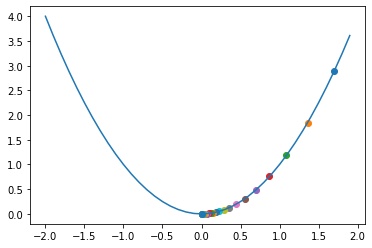

In [38]:
x = np.arange(-2, 2, 0.1)
y = x ** 2
plt.plot(x, y)
grad_descent_v1(lambda x: x ** 2, lambda x: 2 * x, x0=1.7, callback=plt.scatter)

# 10.1.6

In [74]:
def grad_descent_v2(f, df, low=None, high=None, callback=None):
    """
    Реализация градиентного спуска для функций с несколькими локальным минимумами,
    но с известной окрестностью глобального минимума.
    Все тесты будут иметь такую природу.
    :param func: float -> float — функция
    :param deriv: float -> float — её производная
    :param low: float — левая граница окрестности
    :param high: float — правая граница окрестности
    :param callback: callalbe -- функция логирования
    """
    def find_local_min(f, df, low_local, high_local, iters=5000, lr=0.07):
        #функция для нахождения минимума функции f на промежутке (low_local, high_local)
        x0 = np.random.uniform(low_local, high_local)
        x = x0

        for i in range(iters):
            #YOUR CODE. Don't forget to clip x to [low_local, high_local]
            k = 1 if df(x) > 0 else -1
            x = x - k * lr * 1 / (i + 1) ** 0.5
            np.clip(x, low_local, high_local)
            callback(x, f(x))
        #
        return x


    # вам нужно запустить find_local_min несколько раз с разными границами и среди полученных ответов выбрать тот, при котором f имеет наименьшее значение
    # подсказка: np.argmin
    # YOUR CODE
    values = [[low, high / 6], [low + abs(low / 6), high / 5], [low + abs(low / 4), high / 3], [low + abs(low / 3), high / 2], [low + abs(low / 2), high]]
    result = []
    for i in values:
        for iter_ in [500]:
            result.append(find_local_min(f, df, low_local=i[0], high_local=i[1], lr=0.05, iters=iter_))
    # Разбейте отрезок [low,high] на 3-6 равных частей

    # Для каждой части запустите find_local_min несколько
    # (преподавательский код запускает 10) раз
    y = np.vectorize(f)([result])
    best_estimate = result[np.argmin(y)]
    #Найдите общий минимум по всем запускам. Возможно, вы захотите
    #использовать np.argmin
    return best_estimate

3.1415926670948715


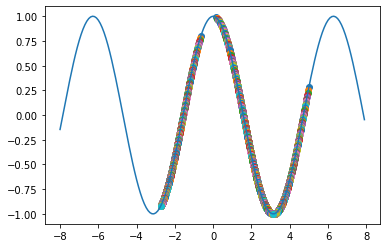

In [75]:
x = np.arange(-8, 8, 0.1)
y = np.cos(x)
plt.plot(x, y)
print(grad_descent_v2(lambda x: np.cos(x), lambda x: -np.sin(x), low=-2, high=6, callback=plt.scatter))

# Ненужное говно

In [103]:
def find_local_min(f, df, low_local, high_local, iters=5000, lr=0.07, callback=None):
    #функция для нахождения минимума функции f на промежутке (low_local, high_local)
    x0 = np.random.uniform(low_local, high_local)
    x = x0

    for i in range(iters):
        #YOUR CODE. Don't forget to clip x to [low_local, high_local]
        k = 1 if df(x) > 0 else -1
        x = x - k * lr * 1 / (i + 1) ** 0.5
        np.clip(x, low_local, high_local)
        callback(x, f(x))
    #
    return x

9.423788047534917

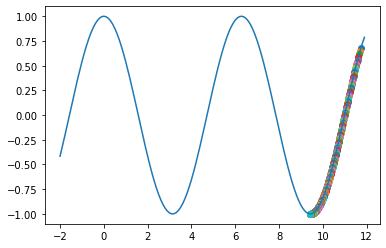

In [104]:
x = np.arange(-2, 12, 0.1)
y = np.cos(x)
plt.plot(x, y)
find_local_min(lambda x: np.cos(x), lambda x: -np.sin(x), callback=plt.scatter, low_local=4, high_local=12.5)

# 10.1.7

In [ ]:
from math import sin, cos, tan, exp, pi
def grad_1(x, y, z):
    #возвращает кортеж из 3 чисел --- частных производных по x,y,z
    dx = z * cos(x * z) + exp(x)
    dy = -2 * y * z
    dz = x * cos(z * x) - y ** 2
    return (dx, dy, dz)

# 10.1.8

In [ ]:
from math import sin, cos, tan, exp, sqrt, pi
def grad_2(x, y, z):
    #возвращает кортеж из 3 чисел --- частных производных по x,y,z
    dx = -((exp(x + y) * sin(exp(x + y))) / cos(exp(x + y))) - (1 / x)
    dy = -((exp(x + y) * sin(exp(x + y))) / cos(exp(x + y))) - (1 / y)
    dz = 0
    return (dx, dy, dz)

# 10.1.9

In [41]:
def numerical_derivative_2d(func, epsilon):
    """
    Функция для приближённого вычисления градиента функции двух переменных.
    :param func: np.array[2] -> float — произвольная дифференцируемая функция
    :param epsilon: float — максимальная величина приращения по осям
    :return: другая функция, которая приближённо вычисляет градиент в точке
    """
    def grad_func(x):
        """
        :param x: np.array[2] — точка, в которой нужно вычислить градиент
        :return: np.array[2] — приближённое значение градиента в этой точке
        """
        return (func((x[0] + epsilon, x[1])) - func((x[0], x[1]))) / epsilon, \
               (func((x[0], x[1] + epsilon)) - func((x[0], x[1]))) / epsilon

    return grad_func


def grad_descent_2d(func, low, high, start=None, callback=None):
    """
    Реализация градиентного спуска для функций двух переменных
    с несколькими локальным минимумами, но известной квадратной окрестностью
    глобального минимума. Все тесты будут иметь такую природу.

    Обратите внимание, что здесь градиент функции не дан.
    Его нужно вычислять приближённо.

    :param callback:
    :param start:
    :param func: np.ndarray -> float — функция
    :param low: левая граница интервала по каждой из осей
    :param high: правая граница интервала по каждой из осей
    """

    if start is not None:
        x = start[0]
        y = start[1]
    else:
        x = np.random.uniform(low, high)
        y = np.random.uniform(low, high)
    eps = 1e-10
    df = numerical_derivative_2d(func, eps)
    lr = 0.5
    for i in range(10 ** 4):
        dxy = df((x, y))
        k1 = 1 if dxy[0] > 0 else -1
        k2 = 1 if dxy[1] > 0 else -1
        x = x - k1 * lr * 1 / (i + 1) ** 0.5
        y = y - k2 * lr * 1 / (i + 1) ** 0.5
        callback((x, y), func((x, y)), s=40, marker='o', color="blue")
    return x, y

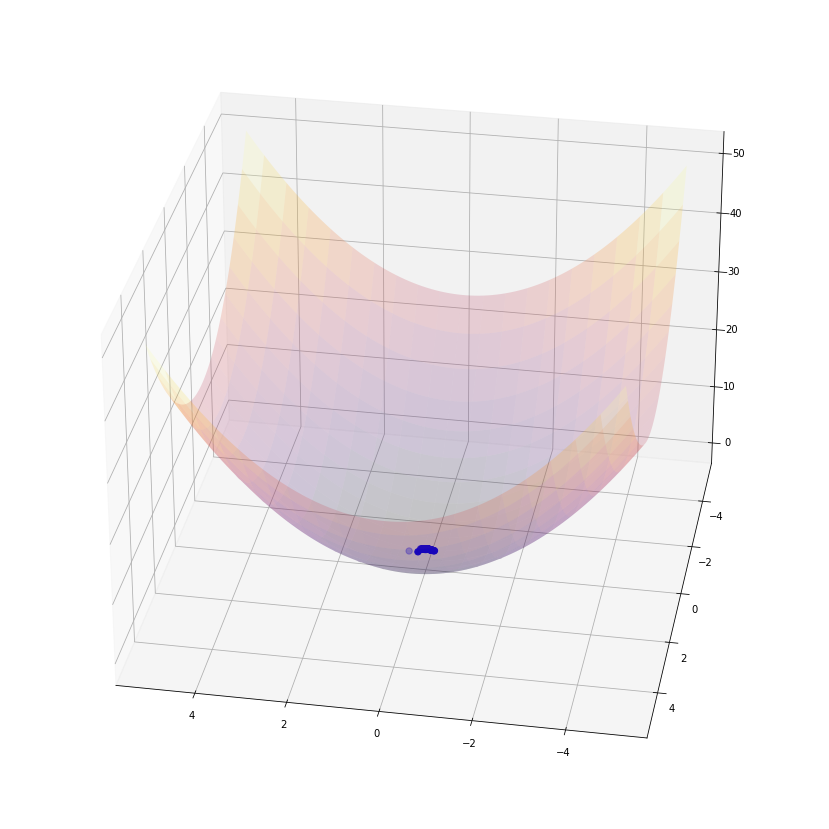

<Figure size 720x720 with 0 Axes>

In [58]:
e = 2.7
func = lambda x: (
        x[0] ** 2 + x[1] ** 2
)
fig=plt.figure(1)
ax =fig.add_subplot(1,1,1,projection="3d")
x, y =np.meshgrid(np.linspace(-5,5,100), np.linspace(-5,5,100))
z = func((x, y))
ax.plot_surface(x, y, z, rstride=5, cstride=5, cmap=cm.inferno,linewidth=0, alpha=.2)
fig.set_size_inches(15, 15)
plt.figure(figsize=(10, 10))
grad_descent_2d(
    func,
    -5,
    5,
    start=np.array([.5, .3]),
    callback=ax.scatter
)
ax.view_init(30, 100)

# Гениальное решение 10.1.9 с форума (оно быстрее работает из-за количества итерация)

In [34]:
def numerical_derivative_2d(func, epsilon):
    def grad_func(x):
        dx = (func((x[0] + epsilon, x[1])) - func(x)) / epsilon
        dy = (func((x[0], x[1] + epsilon)) - func(x)) / epsilon
        return np.array((dx, dy))

    return grad_func


def grad_descent_2d(func, low, high, start=None, lr=0.5, eps = 1e-10, callback=None):
    deriv = numerical_derivative_2d(func, eps)
    estimate = start
    for _ in range(1000):
        estimate = estimate - lr * deriv(estimate)
        callback(estimate, func(estimate), s=40, marker='o', color="blue")

    return estimate

# Ответы тестовые
10.1.1 - f(x) = |x|^2 и система

10.1.2 - 30.3

10.1.3 - 0.69